Tri Mulyani Ayuningtyas _ JumaTec

# Activity ML-6

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1

- Gunakan dataset Mall_Customers.csv
- Gunakan variable Age, AnnualIncome, dan SpendingScore
- Lakukan clustering menggunakan model AHC dan K-Means
- Tentukan nilai K terbaik untuk setiap model
- Bandingkan SC model K-Means dengan AHC
- Tarik kesimpulan activity dan paparkan mana model terbaik

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
#Menginstal library machine learning visualization yellowbrick
!pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Import library KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
#Load Dataset
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


In [ ]:
#Memeriksa kelengkapan data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


In [ ]:
# Kita memilih 3 variabel Age, AnnualIncome dan SpendingScore
X = data[['Age', 'AnnualIncome', 'SpendingScore']].values
X

array([[  19,   15,   39],
       [  21,   15,   81],
       [  20,   16,    6],
       [  23,   16,   77],
       [  31,   17,   40],
       [  22,   17,   76],
       [  35,   18,    6],
       [  23,   18,   94],
       [  64,   19,    3],
       [  30,   19,   72],
       [  67,   19,   14],
       [  35,   19,   99],
       [  58,   20,   15],
       [  24,   20,   77],
       [  37,   20,   13],
       [  22,   20,   79],
       [  35,   21,   35],
       [  20,   21,   66],
       [  52,   23,   29],
       [  35,   23,   98],
       [  35,   24,   35],
       [  25,   24,   73],
       [  46,   25,    5],
       [  31,   25,   73],
       [  54,   28,   14],
       [  29,   28,   82],
       [  45,   28,   32],
       [  35,   28,   61],
       [  40,   29,   31],
       [  23,   29,   87],
       [  60,   30,    4],
       [  21,   30,   73],
       [  53,   33,    4],
       [  18,   33,   92],
       [  49,   33,   14],
       [  21,   33,   81],
       [  42,   34,   17],
 

In [ ]:
#Kita perlu standarisasi terlebih dahulu
X = StandardScaler().fit_transform(X)
X

array([[-5.63212969e-01, -4.31393298e-01, -4.21372977e-01],
       [-5.19454111e-01, -4.31393298e-01,  9.16824758e-01],
       [-5.41333540e-01, -4.24485019e-01, -1.47281405e+00],
       [-4.75695253e-01, -4.24485019e-01,  7.89377354e-01],
       [-3.00659821e-01, -4.17576739e-01, -3.89511126e-01],
       [-4.97574682e-01, -4.17576739e-01,  7.57515504e-01],
       [-2.13142105e-01, -4.10668459e-01, -1.47281405e+00],
       [-4.75695253e-01, -4.10668459e-01,  1.33102882e+00],
       [ 4.21361338e-01, -4.03760179e-01, -1.56839961e+00],
       [-3.22539250e-01, -4.03760179e-01,  6.30068100e-01],
       [ 4.86999625e-01, -4.03760179e-01, -1.21791925e+00],
       [-2.13142105e-01, -4.03760179e-01,  1.49033807e+00],
       [ 2.90084763e-01, -3.96851899e-01, -1.18605740e+00],
       [-4.53815824e-01, -3.96851899e-01,  7.89377354e-01],
       [-1.69383247e-01, -3.96851899e-01, -1.24978110e+00],
       [-4.97574682e-01, -3.96851899e-01,  8.53101056e-01],
       [-2.13142105e-01, -3.89943619e-01

Sebelum mentraining K-Means, kita mencari nilai K yang baik terlebih dahulu menggunakan Metode Elbow atau KElbowVisualizer pada Python

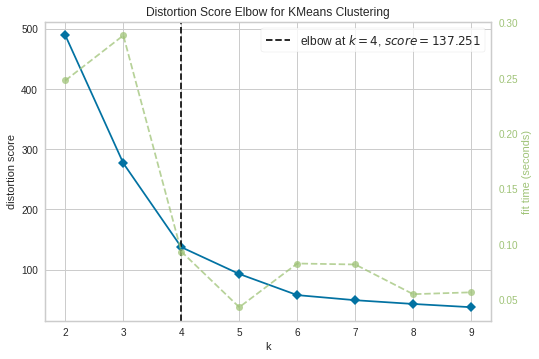

In [ ]:
tes_model = KMeans(random_state=42)
visualizer = KElbowVisualizer(tes_model, k=(2,10))
visualizer.fit(X)
visualizer.show()

Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=4


Maka nilai K terbaik/optimal adalah 4.

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:
- cluster bejumlah 4 (K=4)
- random state bernilai 42

Random state berguna untuk mengontrol ke-random-an inisiasi centroid.

In [ ]:
jumlah_cluster = 4
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

model_kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [ ]:
#Hasil Clustering
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3],
      dtype=int32)

Karena kita menentukan K=4 (cluster berjumlah 4), maka kita akan mendapat 4 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method cluster_centers_.

In [ ]:
print(model_kmeans.cluster_centers_)

[[-2.49494480e-02 -1.45773265e-01 -5.69056962e-01]
 [ 6.44695610e+00  1.73772025e-01  5.57582390e-03]
 [-1.42033960e-01  7.52694521e+00 -1.18685394e-01]
 [-3.37037667e-01 -1.13279492e-01  1.02008786e+00]]


**EVALUASI**

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:
1. Melihat dendrogram
2. Metode elbow
3. Visualisasi data
4. Silhouette Coefficient (SC)

Dendrogram digunakan pada model AHC.
Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

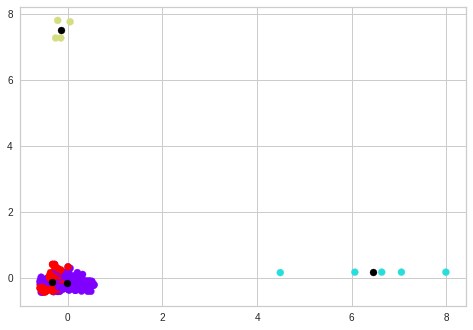

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')

plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

Terlihat hasil clustering sudah cukup bagus.

Kemudian kita bisa menggunakan silhouette_score untuk mendapat Silhouette Score model yang telah kita training

In [ ]:
SC_kmeans = silhouette_score

Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus

**KESIMPULAN**

In [ ]:
#Simpan Hasil clustering ke dalam dataset
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,0
2,Male,21,15,81,3
3,Female,20,16,6,0
4,Female,23,16,77,3
5,Female,31,17,40,0
...,...,...,...,...,...
209,Female,35,1207,79,2
210,Female,45,126,182,3
211,Male,32,126,174,3


Menghitung Rata-rata untuk menarik kesimpulan

In [ ]:
for i in range(jumlah_cluster):
  print(f'Cluster ke-{i}')
  print('Rata-rata pemasukan customer :', data[data['Hasil_Clustering']==i]['AnnualIncome'].mean())
  print('Rata-rata pengeluaran customer :', data[data['Hasil_Clustering']==i]['SpendingScore'].mean())
  print()

Cluster ke-0
Rata-rata pemasukan customer : 56.3445945945946
Rata-rata pengeluaran customer : 34.36486486486486

Cluster ke-1
Rata-rata pemasukan customer : 102.6
Rata-rata pengeluaran customer : 52.4

Cluster ke-2
Rata-rata pemasukan customer : 1167.0
Rata-rata pengeluaran customer : 48.5

Cluster ke-3
Rata-rata pemasukan customer : 61.04819277108434
Rata-rata pengeluaran customer : 84.24096385542168

